# EXPLORATION 3: Camera sticker

### 1. Import module

In [50]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

### 2. 이미지 로딩

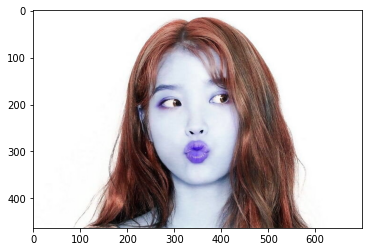

In [105]:
my_image_path = os.getenv('HOME') + '/aiffel/workplace/E03_camera_sticker/images/IU.jpeg'
img_bgr = cv2.imread(my_image_path, -1)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()                  # 출력용 이미지를 따로 보관합니다. (딥카피)

# 잘 로딩 되었는지 이미지 출력하여 확인
plt.imshow(img_bgr)
plt.show()

(1) 일반적 이미지 라이브러리는 모두 이미지 채널을 RGB(빨강, 녹색, 파랑) 순으로 사용  
(2) OpenCv는 예외적으로 BGR(파랑, 녹색, 빨강)을 사용.  
(3) OpenCv에서 다룬 이미지를 다른 이미지 라이브러리를 활용하여 출력하려면 색깔 보정처리 필요.

### 3. RGB 채널로 변환

(1) 주피터 노트북에서는 새창을 만들 수 없기 떄문에 cv2.imshow('window title', src) 함수를 사용할 수 없다.  
(2) 따라서 matplotlib 함수 사용 plt.imshow(src)

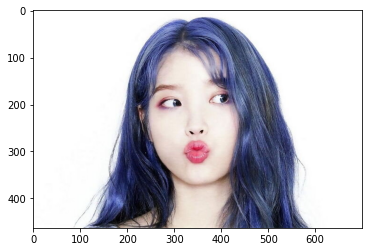

In [106]:
# RGB 채널로 이미지 변환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 잘 변환 되었는지 확인
plt.imshow(img_rgb)
plt.show()

### 4. HOG

(1) dlib_rects 객체에는 찾은 얼굴의 좌표가 rectangles[[(233, 137) (448, 352)]] 형식으로 저장되어 있다.   
(2) rectangles[[(x1, y1) (x2, y2)]] 의 형태로 보면된다.  
(3) (x1, y1)은 사격형의 왼쪽위 꼭지점의 좌표이고  
(4) (x2, y2)는 사각형의 오른쪽 아래 꼭지점의 좌표이다. 

In [107]:
# detector 선언
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb)

print(dlib_rects)

rectangles[[(233, 137) (448, 352)]]


### 5. 찾은 얼굴에 박스 그리기

dlib_rects객체에 있는 각 좌표를 추출해서 해당 좌표를 사용하여 사격형을 그린다.

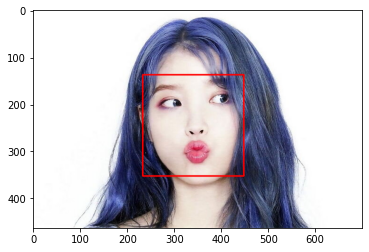

In [108]:
for dlib_rect in dlib_rects:
    x1 = dlib_rect.left()
    y1 = dlib_rect.top()
    x2 = dlib_rect.right()
    y2 = dlib_rect.bottom()

    cv2.rectangle(img_show, (x1,y1), (x2,y2), (0,0,255), 2, lineType=cv2.LINE_AA)

# 제대로 그려지는지 확인해 보자.
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

 ### 6. landmark 모델 로딩

자 이제 랜드마크 모델을 로딩해서 찾아낸 얼굴영역에 랜드마크를 찍어 주자.

In [109]:
model_path = os.getenv('HOME')+'/aiffel/workplace/E03_camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

### 7. Face Landmark 검출

#### haar (HOG)로 검출된 박스에서 face landmark를 찾는다.  
(1) 본 프로젝트에 사용된 사진은 얼굴이 하나이므로 한개의 박스만 검출  
(2) dlib_rects에 있는 박스의 개수대로(실질적으로 박스데이터는 리스트 타입의 좌표로 이루어져 있음 (x1, y1) (x2, y2) 형태  
(3) landmark_predictor(img_rgb, dlib_rect)의 내부 속성 및 메소드들 중에서 호출 가능한 것은 parts 밖에 없음  
(4) 검출된 랜드마크를 리스트 형태로 list_landmarks에 저장한다.

In [110]:
list_landmarks = []

for dlib_rect in dlib_rects:
    
    # img_rgb 사진에서 dlib_rect영역의 랜드마크를 추출하여 points에 저장
    points = landmark_predictor(img_rgb, dlib_rect)
    
    ## print(dir(points))
    ## print(points.parts())

    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0])) # 검출된 박스가 하나 밖에 없으므로 랜드마크도 한개분량인 68개가 그래서 list_landmarks[0]에만 데이터가 있다.

68


### 8. 랜드마크 출력

자 이제 landmark를 RGB채널로 변경되 이미지에 한번 출력해 보자  
list_landmark에 들어 있는 랜드마크리스트에 들어 있는 얼굴수 만큼 (위 결과에 따르면 68개) for 문에의해서 반복 실행된다.
위에서 언급한대로 list_landmark에는 얼굴 한개분량의 랜드마크(68개)만 들어 있다. 그러니 가장 바깥쪽의 for문은 한번만 실행된다.  
(추후 여러개의 얼굴이 담긴 이미지에서 추가적으로 테스트 할 예정, 일단은 프로젝트 본연의 목적에 집중)

이미지 원본(BGR)에서 랜드마크를 찍은 이후에  
RGB로 변환해서 img_show_rgb 객체에 저장한다.

그리고 plt.imshow()를 사용하여 이미지를 출력하여 확인한다.  
여기서 중요한 것 하나 주피터 노트북에서는 새창을 만들 수 없기 때문에 cv2.imshow()를 사용할 수 없다.  
따라서 plt.imshow()를 사용한다.

여기서 궁금한것 분명히 검출된 박스 안에서 landmark를 찾는다고 설명에는 나와있는데 왜 결과 이미지를 보면 빨간색 박스 바깥쪽으로 landmark가 찍혀 있는 것일까?

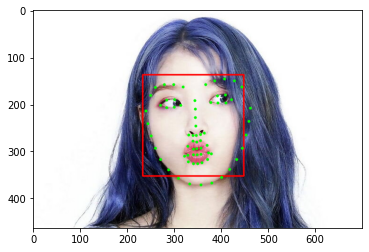

In [111]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 3, (0, 255, 0), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
cv2.circle(img_show, (522, 573), 10, (0, 0, 255), -1)
plt.imshow(img_show_rgb)
plt.show()

### 9. 스티커 부착을 위한 좌표 추출 작업

zip을 사용하여 dlib_rects와 list_landmarks의 데이터를 쉽게 합쳐 보자. 두개의 데이터의 개수는 동일하기 때문에 zip을 사용할 수 있다.  
일단 코의 좌표가중요하다. 코의 좌표는 landmark 30번. landmark[30] 에는 코의 전체 좌표가 들어 있다. (346, 246)  
추후 연산을 위해서 landmark[30][0]과 landmark[30][1]로 분리하여 변수 x와 y에 각각 할당 한다.

이번 프로젝트는 고양이 수염을 코에 배치 하는 것이기 때문에 그냥 코좌표만 알고 있으면 될 듯 하다.

고양이 수염 리사이즈를 위한 아이디어

결국 여기서 하고자 하는 것은 스티커를 이미지에 적합하게 만들기 이해서 어느정도 리사이징 하느냐에 대한 것이고 그것을 위해서는 기준이 필요하다.
왕관 씌우기에서는 리사이징에 대한 기준을 얼굴이 검출되는 사각형으로 잡았었다. 만약 리사이징을 위한 다른 기준이 있다면 그것을 사용해도 된다.

예를 들자면 광대뼈의 landmark를 기준으로 삼아도 된다.
어떤 사람은 고양이 수염을 얼굴윤곽의 안쪽으로 넣고 싶어 하는 사람도 있을 것이고  
또 어떤 사람은 얼굴 바깥쪽으로 빠져나가게 좀더 크게 만들고 싶은 사람이 있을것이다.  
이 경우에 오른쪽과 왼쪽 광대 landmark 각각의 좌표 둘 사이의 차를 사용해서 리사이징 될 고양이수염의 width를 결정해도 된다.  

좀더 구체적으로 말하면 다음과 같은 수식이 될 것이다.

x1: 왼쪽 광대의 landmark x좌표
x2: 오른쪽 광대의 landmark x좌표

face_width = |x2 - x1|
resize_image_width = face_width + weight(조절가중치)  

얼굴보다 크게 하고 싶으면 weight(조절가중치)는 +값이 될것이고 얼굴보다 작게 하고 싶다면 weight(조절가중치)는 -값이 될것이다. 

In [112]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    #y = landmark[30][1] - dlib_rect.width()//2 # 사실 고양이수염 프로젝트에서 이 값은 필요 없다. 이마를 기준으로 뭔가 씌울때나 필요
    y = landmark[30][1]                         # 하여 위의 줄을 이렇게 수정하였다.
    w = dlib_rect.width() # 이 부분은 고양이수염 이미지 리사이징 할때 기준으로 사용할 가능성이 높으므로 일단 킾
    h = dlib_rect.width() # 물론 다른 것을 기준으로 삼을 수 있다.
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(346, 246)
(x,y) : (346,246)
(w,h) : (216,216)


### 10. 고양이 수염 이미지 리사이즈 및 좌표 재설정

(1) 위 9단계에서 계산된 x, y, w, h가 어디에 사용되느냐를 파악해야 한다. 일단 x는 코의 x좌표를 의미한다. 
- w는 얼굴검출 사각형의 넓이 값이다.
- h도 얼굴검출 사격형의 넓이 값이다.
- 직사각형이다.  

(2) 아래 코드 상에서 refined_x와 refined_y의 경우 무엇을 위해서 사용하는지도 파악해야 한다.  
(3) 일단 스티커 이미지를 로드 한다.  
(4) 스티커 이미지를 리사이즈 하는데 얼굴검출 사각형의 넓이 기준으로 리사이즈를 한다. Fig1. Fig2 참고 얼굴검출 사각형이 좌표를 정하는 기준이 될 것임을 의미한다.  
(5) 512 x 512 사이즈의 Fig1의 이미지를 발견된 얼굴에 맞도록 리사이즈 하기 위해서는 얼굴검출 사각형의 넓이와 일치 시키면 가장 쉽다. 리사이즈 후의 변화는 Fig2를 참고 하면 된다.

(x,y) : (238,138)


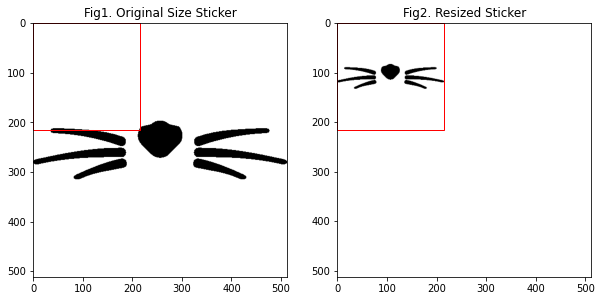

In [113]:
sticker_path = os.getenv('HOME')+'/aiffel/workplace/E03_camera_sticker/images/cat-whiskers.png'
img_sticker_tmp = cv2.imread(sticker_path) # 스티커 이미지 로딩
img_sticker = cv2.resize(img_sticker, (w,h)) # 여기서 기준은 일단 얼굴 검출시 사용된 사격형의 넓이를 기준으로 한다.

refined_x = x - w//2  # 이미지의 정중앙이 코의 x 좌표가 되면 된다. 그러므로 시작점이 될 x좌표는 코의 정중앙에서 리사이즈된 이미지의 절반이 되는 지점이다.
refined_y = y - w//2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


# 그래프 세팅
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(cv2.cvtColor(img_sticker_tmp, cv2.COLOR_BGR2RGB))
ax1.set_title('Fig1. Original Size Sticker')
 
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB))
plt.xlim([0, 512])
plt.ylim([512, 0])
ax2.set_title('Fig2. Resized Sticker')

ax1.add_patch(
   patches.Rectangle(
      (0, 0),                   # (x, y)
      w, w,                     # width, height
      edgecolor = 'red',
      facecolor = 'none',
      #fill=True,
   ))

ax2.add_patch(
   patches.Rectangle(
      (0, 0),                   # (x, y)
      w, w,                     # width, height
      edgecolor = 'red',
      facecolor = 'none',
      #fill=True,
   ))

plt.show()

### 11. 스티커 작업

img_sticker.shape 이 속성은 고양이 수염을 리사이즈한 이미지의 형태(또는 행렬의 형태)가 저장된다. 
np.where()을 사용하여 흰색일경우 sticker_area를 적용하고 즉 흰색을 제거하고 얼굴이미지를 넣고 흰색이 아닌경우는 스티커 이미지로 교체하면 된다. 

In [118]:
# 스티커 영역의 이미지를 잘라낸다. 다시 풀어 보면 img_show[138:354 ,238:454 ]
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

#print(sticker_area.shape)

#print(refined_y)
#print(refined_y+img_sticker.shape[0])

#print(refined_x)
#print(refined_x+img_sticker.shape[1])

#print(img_sticker.shape[0])
#print(img_sticker.shape[1])

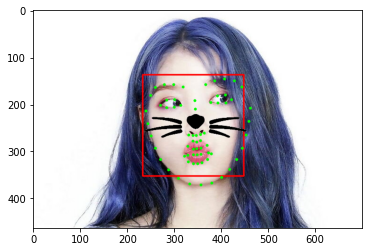

In [116]:
# # 원본 이미지에 스티커를 적용
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

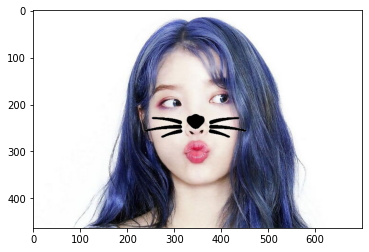

In [117]:
# bounding box와 landmark를 제거
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)


plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 12. 종합회고 (세부적인 회고들은 각 코드 부분마다 모두 작성하였습니다.)

코드를 진행하면서 생각한하고 느끼고 배운 것들에 대한 회고는 각 코드코드 부분마다 모두 기술했고 
여기는 전체적인 프로젝트를 진행하면서 느낀 점에 대해서 기술하려고 한다. 

이번 프로젝트는 좌표에 대한 이해를 하는데 많은 시간을 소모했다. 여러가지 객체들이 더하고 빼지고 이동되고 리사이즈 되는 부분들이 많고
좌표도 여러종류가 사용되었기 때문에 그것을 이해하느라 좀 애를 먹었다. 하지만 덕분에 관련된 부분에 대해서 좀더 확실하고 구체적으로 확인하고 넘어 갈 수 있는 좋은 시간이 되었던 것 같다.

조금만 더 시간이 있고 여유가 있었다면 
OpenCV로 실시간 영상을 받아서 스티커 작업을 해보았으면 하는 바램이 이었다. 

### 이미지 정리를 위한 꼼수

계속 반복 실행을 하다 보면 이미지에 스티커 이미지가 겹쳐져서 지저분해 지게 된다.  
이때 지저분해진 이미지를 정리 해주기 위한 꼼수  
깨끗한 원본 이미지를 다시 카피 ~~

In [103]:
img_show = img_bgr.copy()

### [Study] 슬라이싱 좌표 확인을 위한 테스트

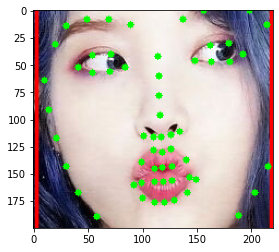

In [102]:
#img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

dst = img_show_rgb[150:350, 230:450]
plt.imshow(dst)